# CHAPTER 2  Dr.Papapantoleon Notes

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import scipy.integrate as integrate
%matplotlib inline

## Inverse Transform 
$f(x) = 3x^2 , 0\leq x \leq 1$

\begin{align*}
\mu=\mathbb{E}_{f(x)}&= \int_{a}^{b}x f(x) dx\\
&=\int_{0}^{1} x 3x^2 dx \\
&= [ \frac{3x^4}{4} ]_{0}^{1}\\
&= \frac{3}{4} \\
&= 0.75
\end{align*}


\begin{align*}
    \mathbf{Var}_{f(x)} &= \int_{a}^{b}(x-\mu)^2 \cdot f(x) dx \\
    &=\int_{0}^{1} \left(x-\dfrac{3}{4}\right)^2 3x^2 \\
    &= \dfrac{3x^3\left(16x^2-30x+15\right)}{80} \\
    &=\dfrac{3\left(16x^5-30x^4+15x^3\right)}{80} \\
    &=\dfrac{48x^5-90x^4+45x^3}{80} \\
    &=\left[\dfrac{48x^5-90x^4+45x^3}{80} \right]_{0}^{1}\\
    &=\dfrac{48-90+45}{80}\\
    &= \dfrac{3}{80} \\
    &= 0.0375
\end{align*}


\begin{align*}
\sigma_{f(x)} &= \sqrt{\mathbf{Var}_{f(x)}} \\
&= \sqrt{\dfrac{3}{80}}\\
&=0.1936492 
\end{align*}


The cdf of $f(x) = 3x^2$ is : 
\begin{align*}
F(x) &= \int_{0}^{x}f(t) dt \\ 
&= \int_{0}^{x}3t^2 dt \\
&= x^3 
\end{align*}

Inversing the cdf: 

\begin{align*}
    y &= x^3 \\
    x &= y^3 \\
    \sqrt[3]{x}&=y\\
    x^{1/3} &= y
\end{align*}


For the inverse method we simulate $U \sim U(0,1)$,$N=10.000$ random pseudo values and we set $g(x) = x^{1/3}$.

Evaluating $g(U) = {U}^{1/3})$ we take the simulated mean and standard deviation which are: $\mu^{\star} = 0.748905$ and $\sigma^{\star} = 0.193114$ close to the theoretical $\mu,\sigma$ which have been calculated above as : $\mu = 0.75,\sigma \approx 0.193$.

The simulates values (bins) of the inverse method appear in the graph to follow the same shape as the theoratical curve of $f(x) = 3x^2$



# mean evaluation with Python

0.75

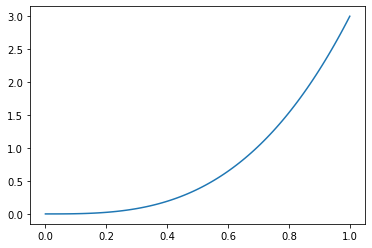

In [2]:
f = lambda x :x*3*x**2
x = np.linspace(0,1,100)
plt.plot(x,f(x))
mu = integrate.quad(f,0,1)[0]
mu

# Variance evaluation with Python

In [3]:
f = lambda x :((x-mu)**2) * (3*x**2)
var = integrate.quad(f,0,1)[0]
var

0.037500000000000006

# Standard Deviation evaluation with Python

In [4]:
sd = np.sqrt(var)
sd

0.19364916731037085

(array([  4.,   1.,   2.,   1.,   2.,   1.,   3.,   5.,   2.,   8.,   4.,
         13.,   9.,   2.,  14.,   9.,  12.,   9.,  16.,  16.,  14.,  14.,
         24.,  22.,  16.,  22.,  28.,  30.,  30.,  26.,  31.,  30.,  37.,
         43.,  32.,  33.,  48.,  50.,  55.,  40.,  48.,  47.,  64.,  62.,
         78.,  67.,  78.,  77.,  75.,  78.,  82.,  82.,  99.,  98.,  92.,
        104.,  95.,  92., 122., 105., 113., 125.,  99., 123., 117., 117.,
        127., 142., 128., 143., 144., 130., 152., 155., 160., 163., 171.,
        152., 183., 197., 202., 188., 205., 199., 235., 221., 217., 222.,
        239., 264., 244., 250., 243., 258., 272., 231., 253., 259., 276.,
        278.]),
 array([0.04078417, 0.05037597, 0.05996776, 0.06955955, 0.07915134,
        0.08874313, 0.09833493, 0.10792672, 0.11751851, 0.1271103 ,
        0.13670209, 0.14629388, 0.15588568, 0.16547747, 0.17506926,
        0.18466105, 0.19425284, 0.20384464, 0.21343643, 0.22302822,
        0.23262001, 0.2422118 , 0.25180359, 0.

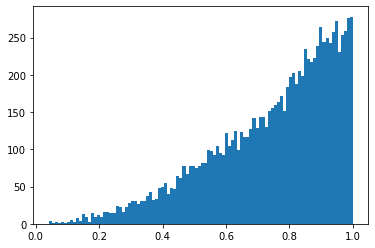

In [5]:
np.random.seed(123)
N = 10000
U = np.random.uniform(0,1,N)
X = U**(1/3)
x = np.linspace(0,1,N)
plt.hist(X,bins=100,linewidth=2)

In [6]:
print(np.mean(X))
print(np.std(X))

0.7487746407110433
0.19422733636529818


## Exercises 2.1 & 2.2 from Dr.Papapantoleon Notes
Implementing the 2.13 example for **Acceptance - Regection** algorithm:
We have the target function: $$f(x) = \sqrt{2/\pi}  \exp^{-\frac{\chi^2}{2} +\mid \chi\mid}$$

In [7]:
def f(x):
    b = np.sqrt(2/np.pi)*np.exp(-x**2/2) 
    return(b)
integrate.quad(f,-np.inf,np.inf)[0]

1.9999999999999993

## G(x)
We define the candidate function $$g(x) = \lambda e^{(-\lambda \cdot x)}$$ which is a double exponential with parameter $\lambda = 1$


In [8]:
def g(x):
    g = np.exp(-x)
    return(g)

## Plot the 2 ranges 
We define the 2 different ranges of the distribution,the positive and the negative ranges for both sides of the distribution.

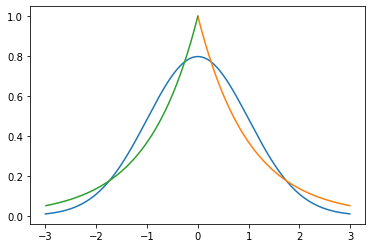

In [9]:
range1 = np.arange(-3,3,0.01)
range2 = np.arange(0,3,0.01)
plt.plot(range1,f(range1))
plt.plot(range2,g(range2))
plt.plot(-range2,g(range2))
plt.show()

## M constant 
If $$P\left(U \leq \frac{f(X)}{M g(X)}\right) = \frac{1}{M}$$
So the probability of acceptance is $\frac{1}{M}$,so $M$ should be as small as possible for a given computational effort.The optimum value of $M$ is the maximum of this ratio.

In [10]:
np.amax(f(range1)/g(range1))

1.315489246958914

## Derivation
The derivative of this function:$$ f/g = \sqrt{(2/\pi)} \exp^{(-\chi^2/2 +\mid \chi \mid)}$$ is:

$$ \displaystyle  \sqrt{(2/\pi)} \exp^{(-\chi^2/2 +\mid \chi \mid) }* (1-x) = 0 $$
$$\chi = 1$$

In [11]:
f(1)/g(1)
M =  f(1)/g(1)
M

1.315489246958914

The double exponential distribution (with parameter $\lambda = 1$) has the density $g(x) =  \frac{1}{2} \exp - \mid x \mid$  for  $x \in \mathbb{R}$. Let $f= \phi$ denote the density of the standard normal distribution. Then:
$$  \frac{\phi(x)}{g(x)}=\sqrt{\frac{2}{\pi}}e^{-\frac{x^2}{2}+ \mid 2 \mid } \leq \sqrt{\frac{2e}{\pi}} \approx 1.315 = c$$

In [12]:
np.sqrt(2*np.e/np.pi)

1.315489246958914

## Acceptance Probability

$$\mathbb{P}_{acceptance} = \frac{1}{M} \approx 0.76$$

In [13]:
P = 1/M
P

0.7601734505331403

## Probability of Rejection 
$$1 - \mathbb{P}^{\star}_{acceptance} =  \mathbb{P}^{\star}_{rejection} \approx 0.24$$

In [14]:
1-P

0.23982654946685966

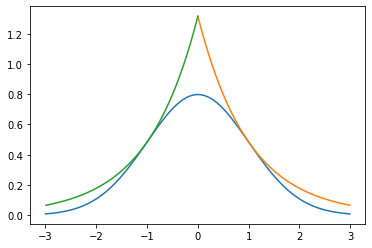

In [15]:
plt.plot(range1,f(range1))
plt.plot(range2,M *g(range2))
plt.plot(-range2,M *g(range2))

Implement acceptance - Rejection in a function in Python:

We generate $Y \sim g, U \sim U[0,M]$ 
and then we accept $X=Y$ if $U \leq \frac{f(Y) }{M \cdot g(Y)}$


In order to calculate the actual probability of acceptance in the while loop format the output of the previous calculations is mot useful, since it contains only the accepted values.To find the probability of acceptance we have to count the accepted values and the rejected values inside the body of the previous while loop.Therefore we must have:

In [16]:
np.random.seed(123)
n=10000
M=1.5
X = 0
AR = np.repeat(0,n)

iterations = 0
accept     = 0
while (X < n):
    iterations += 1
    u = np.random.uniform(0,1,1)
    y = np.random.uniform(0,1,1)
    if (u < f(y)/(M*g(y))):
        accept += 1
        X += 1
        AR = y
accept

10000

## Total number of iterations executed in the while loop 

In [17]:
iterations

13244

## The actual probability of Acceptance 

Consequently the $P_{acceptance}^{\star} \approx 0.755$ close to the theoretical probability

In [18]:
accept/iterations

0.7550588945937783


## The actual probability of Rejection

$P_{rejection}^{\star} \approx 0.244$


In [19]:
reject = iterations - accept
reject/iterations 

0.2449411054062217


## Exercise 2.3 from  Dr.Papapantoleon Notes

Implementing **Box Muller**  method:
If $U_{1}$ and $U_{2}$ are iid $U_{[0,1]}$,the variables $X_{1}$ and $X_{2}$ are defined by $$X_{1} = \sqrt{-2 \log (U_{1})} \cos(2\pi U_{2}) $$ and 
$$X_{2} = \sqrt{-2 \log (U_{1})} \sin(2\pi U_{2}) $$ are iid $X_{1},X_{2}\sim Normal(\mu,\sigma)$ 

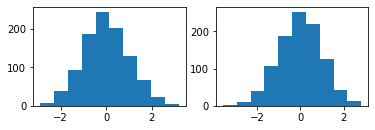

In [20]:
def gaussian(u1,u2):
    z1 = np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2)
    z2 = np.sqrt(-2*np.log(u1))*np.sin(2*np.pi*u2)
    return z1,z2


u1 = np.random.rand(1000)
u2 = np.random.rand(1000)

# run the transformation
z1,z2 = gaussian(u1,u2)

# plotting the values b after the transformation
plt.subplot(223) # the second contains
plt.hist(z1)     # the histograms of z1 and z2
plt.subplot(224)
plt.hist(z2)
plt.show()

## Normality test 
$X_{1}$ and $X_{2}$ variables have now been reproduced from the Box Muller algorithm above.
Now we have to implement a normality test that test the following hypothesis:
$$ H_{0}: X_{1},X_{2} \sim Normal(\mu,\sigma^2)$$ against
$$ H_{1}: X_{1},X_{2} \nsim Normal(\mu,\sigma^2)$$

In [21]:
from scipy import stats

Concatenating the two resulting arrays as one array $d = x1,x2$ and ploting it we observe the normal density plot. 

(array([  2.,   0.,   0.,   0.,   1.,   0.,   4.,   4.,   6.,   4.,  12.,
         13.,  21.,  28.,  28.,  33.,  43.,  54.,  61.,  63.,  82.,  85.,
        107.,  97., 116., 111.,  96., 100.,  93.,  92., 113.,  81.,  85.,
         67.,  63.,  48.,  37.,  34.,  31.,  19.,  18.,  11.,   9.,   9.,
         11.,   3.,   2.,   2.,   0.,   1.]),
 array([-3.5598609 , -3.42513336, -3.29040582, -3.15567828, -3.02095073,
        -2.88622319, -2.75149565, -2.61676811, -2.48204057, -2.34731303,
        -2.21258549, -2.07785795, -1.9431304 , -1.80840286, -1.67367532,
        -1.53894778, -1.40422024, -1.2694927 , -1.13476516, -1.00003762,
        -0.86531008, -0.73058253, -0.59585499, -0.46112745, -0.32639991,
        -0.19167237, -0.05694483,  0.07778271,  0.21251025,  0.3472378 ,
         0.48196534,  0.61669288,  0.75142042,  0.88614796,  1.0208755 ,
         1.15560304,  1.29033058,  1.42505812,  1.55978567,  1.69451321,
         1.82924075,  1.96396829,  2.09869583,  2.23342337,  2.36815091,
 

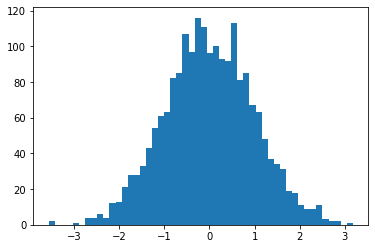

In [22]:
d= np.concatenate((z1,z2))
plt.hist(d,bins = 50)

In [23]:
k2, p = stats.normaltest(d)

## statistic value

In [24]:
k2

0.30383053276575395

## p-value

In [25]:
p

0.8590610690089799

In [26]:
alpha = 0.05
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
     print("The null hypothesis can be rejected")
else:
     print("The null hypothesis cannot be rejected")

p = 0.859061
The null hypothesis cannot be rejected


## Exercise 2.7 **Papapantoleon Notes** 
We set the function for the Black Scholes Formula 
$$ c = S_{0}e^{-rT}N(d_{1} - K e^{-rT}N(d_{2})) $$
$$ p = K e^{-rT}N(-d_{2})) -S_{0}e^{-rT}N(-d_{1}) $$
$$ d_{1} = \frac{\log(S_{0}/K) + (r+ \sigma^2)T}{\sigma \sqrt{T}}$$
$$ d_{2} = \frac{\log(S_{0}/K) + (r- \sigma^2)T}{\sigma \sqrt{T}}$$

and finally the call price is evaluated by :
$$\mathbb{S}_{0} \times \Phi(d_{1}) - K e^{-rT}\times \Phi (d_{2}) $$
where $\Phi$ is the standard normal distribution value at $d_{1}$ and $d_{2}$. 

In [27]:
from scipy.stats import norm
def Call(S, K, r, T, sigma):
    d1  =  (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2  =  d1 - sigma * np.sqrt(T)
    return(S * norm.cdf(d1)  - K*np.exp(-r*T)*norm.cdf(d2))

In [28]:
Call(S=100, K=70, r=0, T=1, sigma=.16)

30.060024946553497

In [29]:
def Put(S, K, r, T, sigma):
    d1  =  (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2  =  d1 - sigma*np.sqrt(T)
    return(-S * norm.cdf(-d1) + K*np.exp(-r*T)*norm.cdf(-d2))

In [30]:
Put(S=100, K=70, r=0, T=1, sigma=.16)

0.06002494655348656

Now we write a new function for the Monte Carlo Simulation Method.
Note here that as has been asked the function evaluates the mean,the confidence intervals (lower and upper bound) at $\alpha =0.05$  confidence level and also the RMSE.

In [31]:
from scipy.stats import norm
import numpy as np
np.random.seed(123)
def Callsim(S0, K, r, Ti, sigma,M):
    ri      = (r-0.5*sigma**2)*Ti
    sd      = sigma*np.sqrt(Ti)
    price   = S0*np.exp(ri+sd*np.random.normal(0,1,M))
    call    = np.maximum(price - K,0)
    Pcall   = call*(np.exp(-ri*Ti))
    pricem  = np.mean(Pcall)
    SE      = norm.ppf(1-0.05/2) * np.std(Pcall)/np.sqrt(M)
    lower95 = pricem - SE
    upper95 = pricem + SE
    rmse    = np.var(Pcall)/(M)
    return(pricem,SE,lower95,upper95,rmse)


S0 = 100     
K  = 70        
r  = 0.02      
Ti = 1/4       
sigma  = 0.02 
M = 10000
Callsim(S0,K,r,Ti,sigma,M)

(30.473260265154007,
 0.019639236380525504,
 30.453621028773483,
 30.49289950153453,
 0.00010040446184985091)

##  Exercises  2.9 & 2.10  **Papapantoleon Notes** (Variance Reduction Techniques)

In [32]:
M  = 10000
S0 = 100
K  = 70
r  = 0.02
Ti = 1/4       
sigma = 0.02

In [33]:
Callsim(S0,K,r,Ti,sigma,M)

(30.473972148623265,
 0.019729072050840013,
 30.454243076572425,
 30.493701220674104,
 0.00010132512208393378)

# Antithetic Variates 

In [34]:
def Callavsim(S0, K, r, Ti, sigma,M):
   
    ri      = (r-0.5*sigma**2)*Ti
    sd      = sigma*np.sqrt(Ti)
    U       = np.random.normal(0,sd,int(M/2))
    st1     = S0*np.exp(ri+U)
    st2     = S0*np.exp(ri-U)
    price   = (st1+st2) / 2
    call    = np.maximum(price - K,0)
    Pcall   = call*(np.exp(-ri*Ti))
    pricem  = np.mean(Pcall)
    SE      = norm.ppf(1-0.05/2)*np.std(Pcall)/np.sqrt(M)
    lower95 = pricem - SE
    upper95 = pricem + SE
    rmse    = np.var(Pcall)/(M)
    return(pricem,SE,lower95,upper95,rmse)


S0 = 100     
K  = 70        
r  = 0.02       
Ti = 1/4       
sigma  = 0.02 
M = 10000
Callavsim(S0,K,r,Ti,sigma,M)

(30.46331996159101,
 0.0001328190241285658,
 30.463187142566884,
 30.46345278061514,
 4.592237999645394e-09)

#  CONTROL VARIATE MONTE CARLO SIMULATION

In [35]:
def Callcvsim(S0, K, r, Ti, sigma,M):
    st = S0*np.exp((r-0.5*sigma**2)*Ti + sigma* np.random.normal(0,np.sqrt(Ti),M))
    payoff  = np.exp(-r*Ti)*np.maximum(st-K,0)
    theta   = np.cov(st,payoff)[0,1]/np.var(st)
    cv      = payoff - theta*(st - S0*np.exp(r*Ti))
    Price   = np.mean(cv)
    SE      = norm.ppf(1-0.05/2)*np.std(cv)/np.sqrt(M)
    lower95 = Price - SE
    upper95 = Price + SE
    rmse    = np.var(cv)/(M)                                                             
    return(Price,SE,lower95,upper95,rmse)




S0 = 100     
K  = 70        
r  = 0.02       
Ti = 1/4       
sigma  = 0.02 
M = 10000
Callcvsim(S0,K,r,Ti,sigma,M)



(30.34912506278054,
 1.97836559217114e-06,
 30.34912308441495,
 30.349127041146133,
 1.0188656442709037e-12)

# Mixed Method for AV & CV

In [36]:
def Callmxsim(S0, K, r, Ti, sigma,M):
   
    ri      = (r-0.5*sigma**2)*Ti
    sd      = sigma*np.sqrt(Ti)
    U       = np.random.normal(0,sd,int(M/2))
    st1     = S0*np.exp(ri+U)
    st2     = S0*np.exp(ri-U)
    price   = (st1+st2) / 2
    
 
    price1  = np.maximum(price - K,0) * np.exp(-r*Ti)
    theta   = np.cov(price,price1)[1,0]/np.var(price1)
    mx      = price1 - theta*(price - S0*np.exp(r*Ti))
       
    Price   = np.mean(mx)
    SE      = norm.ppf(1-0.05/2)*np.std(mx)/np.sqrt(M)
    lower95 = Price - SE
    upper95 = Price + SE
    rmse    = np.var(mx)/(M)                                                             
    return(Price,SE,lower95,upper95,rmse)



S0 = 100     
K  = 70        
r  = 0.02       
Ti = 1/4       
sigma  = 0.02 
M = 10000
Callmxsim(S0,K,r,Ti,sigma,M)

(30.349127242102707,
 1.4189892556587828e-06,
 30.34912582311345,
 30.349128661091964,
 5.241577748609668e-13)

# Comparison of these 4 methods 


In [37]:
mc = Callsim(S0,K,r,Ti,sigma,M)
av = Callavsim(S0,K,r,Ti,sigma,M)
cv = Callcvsim(S0,K,r,Ti,sigma,M)
mx = Callmxsim(S0,K,r,Ti,sigma,M)

In [43]:
df = pd.DataFrame({'Plain Monte - Carlo':mc,
                   'Antithetic Variates':av,
                   'Control Variates'   :cv,
                   'Mixed AV & CV'      :mx   })
df.index = ['Price', 'Standard Error', 'Lower 95%', 'Upper 95%', 'RMSE']
np.round(df,5)

,Plain Monte - Carlo,Antithetic Variates,Control Variates,Mixed AV & CV
Price,30.46306,30.46350,30.34913,30.34913
Standard Error,0.01976,0.00014,0.00000,0.00000
Lower 95%,30.44330,30.46337,30.34913,30.34912
Upper 95%,30.48282,30.46364,30.34913,30.34913
RMSE,0.00010,0.00000,0.00000,0.00000


In [48]:
np.round(df,13) # rounding up to 13 demical to observe the difference in RMSE 

,Plain Monte - Carlo,Antithetic Variates,Control Variates,Mixed AV & CV
Price,30.463060,3.046350e+01,3.034913e+01,3.034913e+01
Standard Error,0.019760,1.352412e-04,1.941996e-06,1.435575e-06
Lower 95%,30.443300,3.046337e+01,3.034913e+01,3.034912e+01
Upper 95%,30.482820,3.046364e+01,3.034913e+01,3.034913e+01
RMSE,0.000102,4.761300e-09,1.000000e-12,5.000000e-13
